# Proportional EGH Modeling

## How to Modify the Component Proportions

First, let us introduce what we think are the standard steps as follows.

* Default decomposition
* Show the default proportions
* Decompose with modified proportions
* Confirm by comparison Plot

zeros at the angular ends of error data have been replaced with the adjacent values.
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


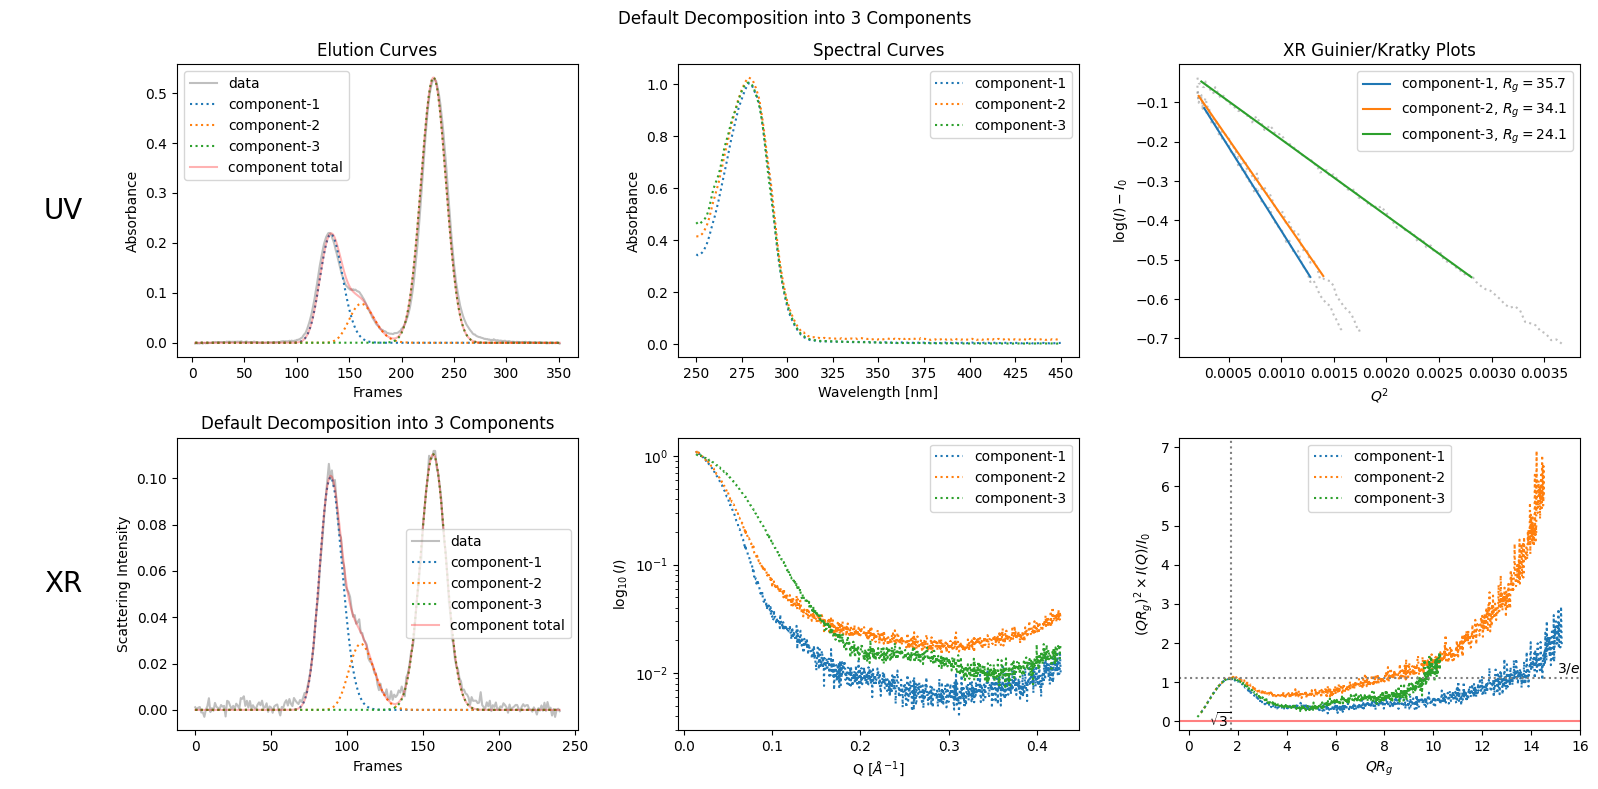

In [1]:
from molass import get_version
assert get_version() >= '0.5.2', "This tutorial requires molass version 0.5.2 or higher."
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition(num_components=3)
decomposition.plot_components(title="Default Decomposition into 3 Components");

In [2]:
proportions = decomposition.get_proportions()
proportions

array([0.39588467, 0.12442568, 0.47968965])

In [3]:
modified_decomposition = corrected_ssd.quick_decomposition(num_components=3, proportions=[0.32, 0.20, 0.48])

Proportions of the first decomposition: [0.39588467 0.12442568 0.47968965]
Proportions of the second decomposition: [0.31999386 0.20000772 0.47999841]


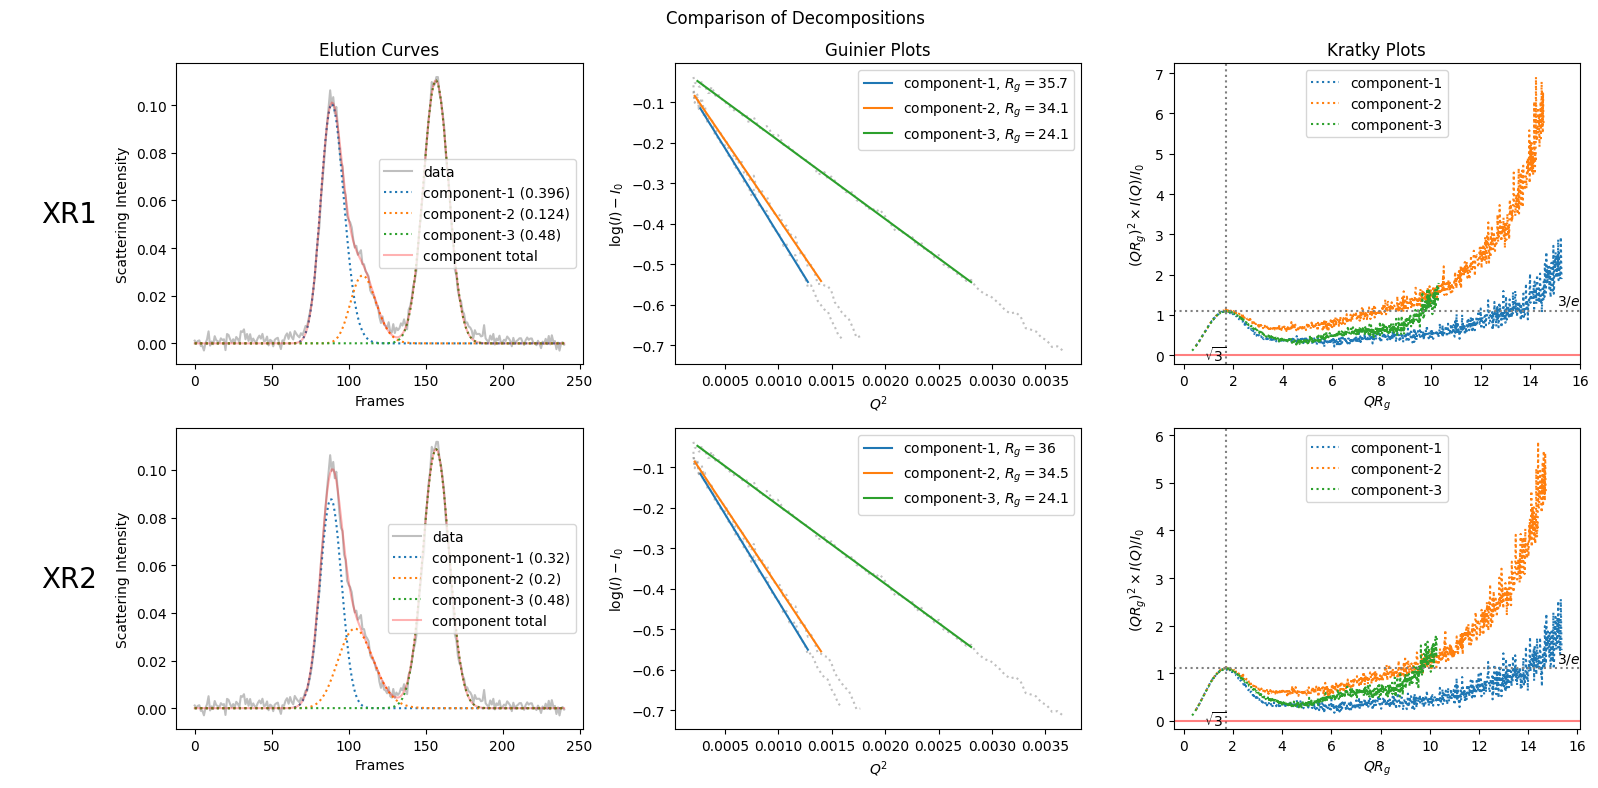

In [4]:
from molass.PlotUtils.Comparison import comparison_plot
comparison_plot([decomposition, modified_decomposition], title="Comparison of Decompositions", show_proportions=True)

In this comparison plot, we can compare the propotions easily.

## How to Vary the Component Proportions
In the previous example, we could be reasonably confident about the number of components, to a certain extent, based on the observation of the elution curve.
However, that is not always the case. To illustrate this, let us consider another example where we cannot be so confident.

Below, we will decompose another sample in two ways: first into two components, and then into three components. We will also vary the proportions using another utility function.

### Preparation

For effective observation, we will also prepare the Rg curve.

In [5]:
from molass_data import SAMPLE4
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE4)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
rgcurve = corrected_ssd.xr.compute_rgcurve()

100%|██████████| 203/203 [00:03<00:00, 52.80it/s] 


### Varying Proportions into Two Components 

In [6]:
import numpy as np
num_trails = 8
species1_proportions = np.ones(num_trails) * 3
species2_proportions = np.linspace(1, 3, num_trails)
proportions = np.array([species1_proportions, species2_proportions]).T
proportions

array([[3.        , 1.        ],
       [3.        , 1.28571429],
       [3.        , 1.57142857],
       [3.        , 1.85714286],
       [3.        , 2.14285714],
       [3.        , 2.42857143],
       [3.        , 2.71428571],
       [3.        , 3.        ]])

D:\Github\molass-library\molass\Decompose\VaryUtils.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


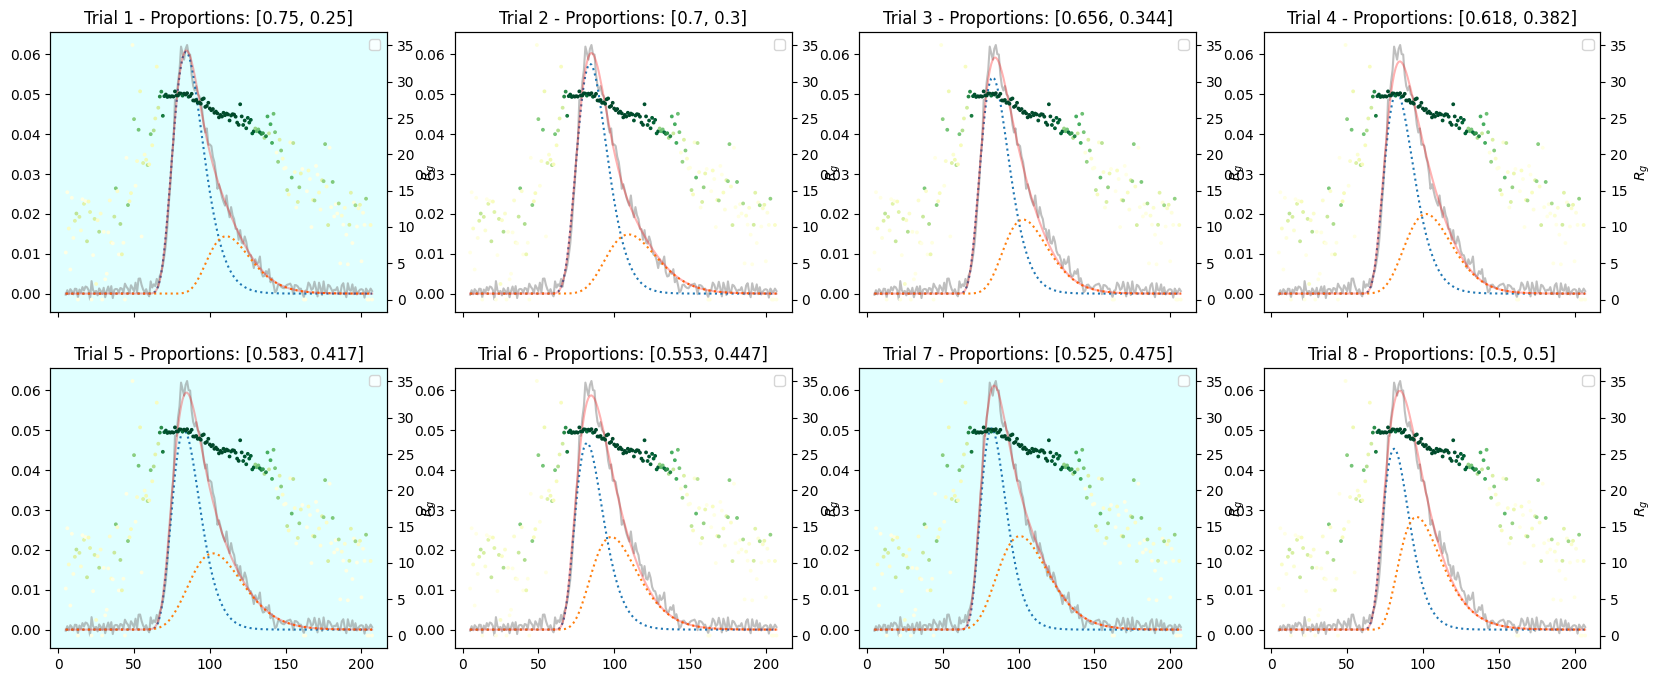

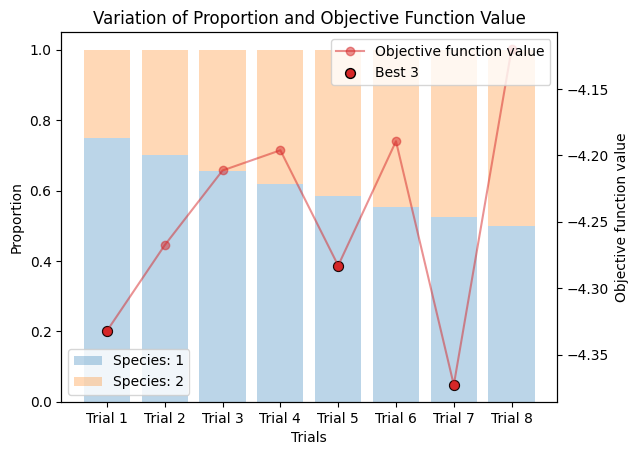

In [7]:
from molass.Decompose.VaryUtils import plot_varied_decompositions
corrected_ssd.plot_varied_decompositions(proportions, rgcurve=rgcurve, best=3);

### Varying Proportions into Three Components 

In [8]:
species3_proportions = np.ones(num_trails) * 1
proportions = np.array([species1_proportions, species2_proportions, species3_proportions]).T
proportions

array([[3.        , 1.        , 1.        ],
       [3.        , 1.28571429, 1.        ],
       [3.        , 1.57142857, 1.        ],
       [3.        , 1.85714286, 1.        ],
       [3.        , 2.14285714, 1.        ],
       [3.        , 2.42857143, 1.        ],
       [3.        , 2.71428571, 1.        ],
       [3.        , 3.        , 1.        ]])

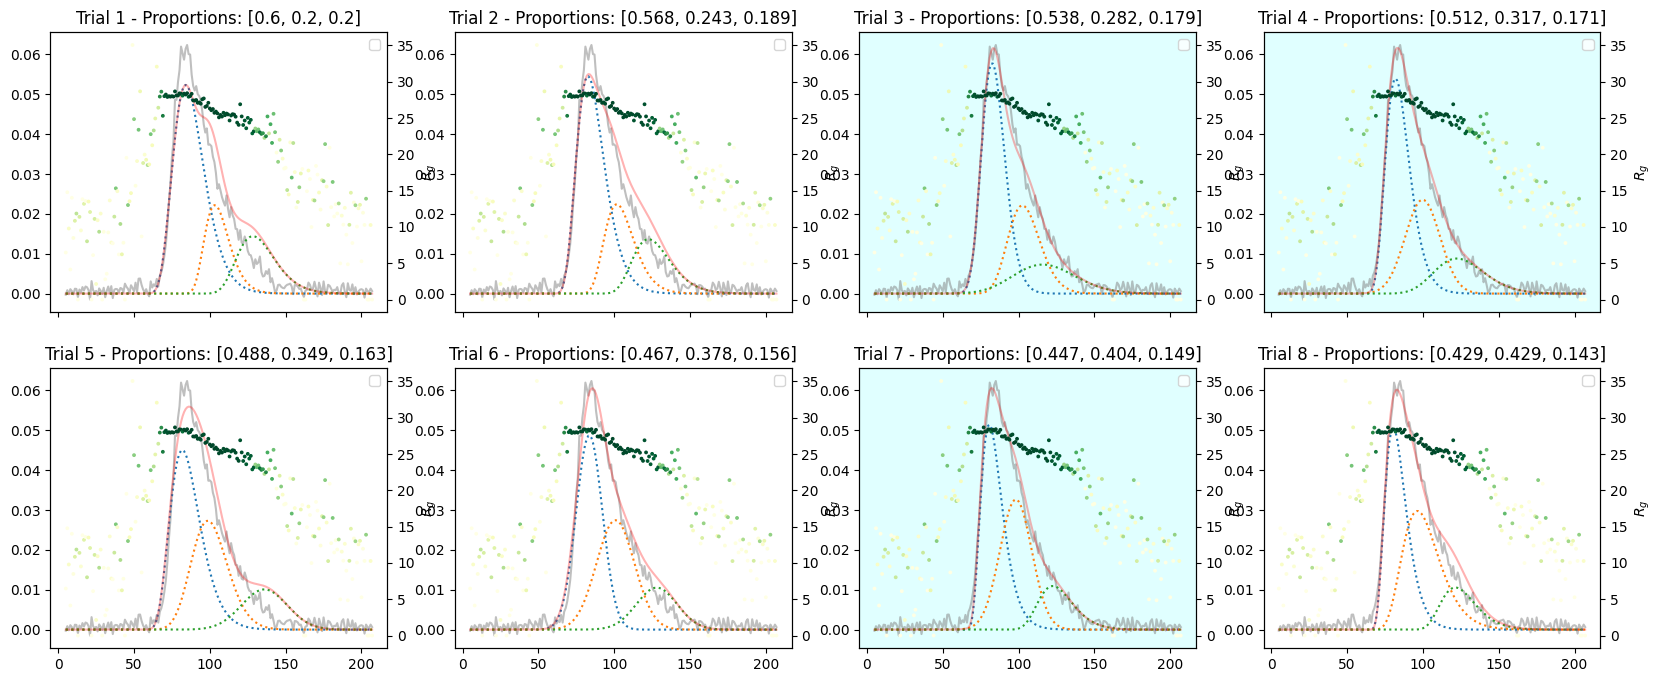

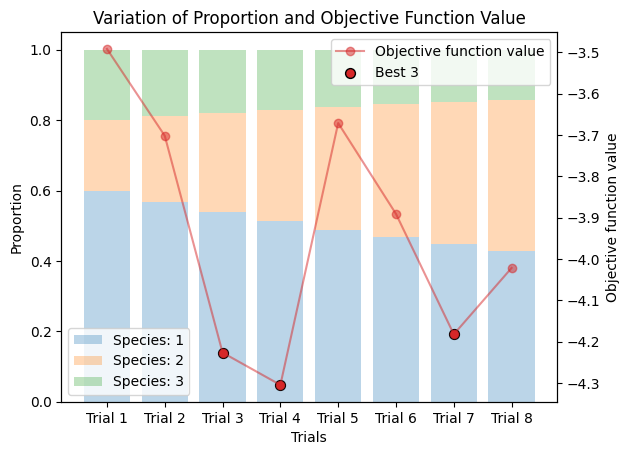

In [9]:
corrected_ssd.plot_varied_decompositions(proportions, rgcurve=rgcurve, best=3);